#📥 Import dan Unduh Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prekshad2166/student-study-habits")

print("Path to dataset files:", path)

100%|██████████| 21.8k/21.8k [00:00<00:00, 24.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prekshad2166/student-study-habits/versions/1


#📦 Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#1. EDA (Exploratory Data Analysis)
📌 Penjelasan:
Tahap EDA digunakan untuk memahami struktur data, menemukan pola, outlier, atau anomali. Biasanya mencakup:

* df.head() → melihat beberapa baris pertama
* df.info() → tipe data dan jumlah null
* df.describe() → ringkasan statistik numerik
* df.isnull().sum() → mendeteksi data kosong


In [3]:
df = pd.read_csv(path + "/student_study_habits.csv")
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


## Cek nilai null

In [4]:
df.isnull().sum()

,0
study_hours_per_week,0
sleep_hours_per_day,0
attendance_percentage,0
assignments_completed,0
final_grade,0
participation_level_Low,0
participation_level_Medium,0
internet_access_Yes,0
parental_education_High School,0
parental_education_Master's,0


## Informasi umum dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

## Deskripsi Data

In [6]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#2. Visualisasi Korelasi
📌 Penjelasan:
Menggunakan sns.heatmap() atau sns.pairplot() untuk melihat:
* Hubungan antar variabel numerik (misal: study_hours terhadap final_grade)
* Menentukan fitur mana yang punya korelasi tinggi dengan target (final_grade)



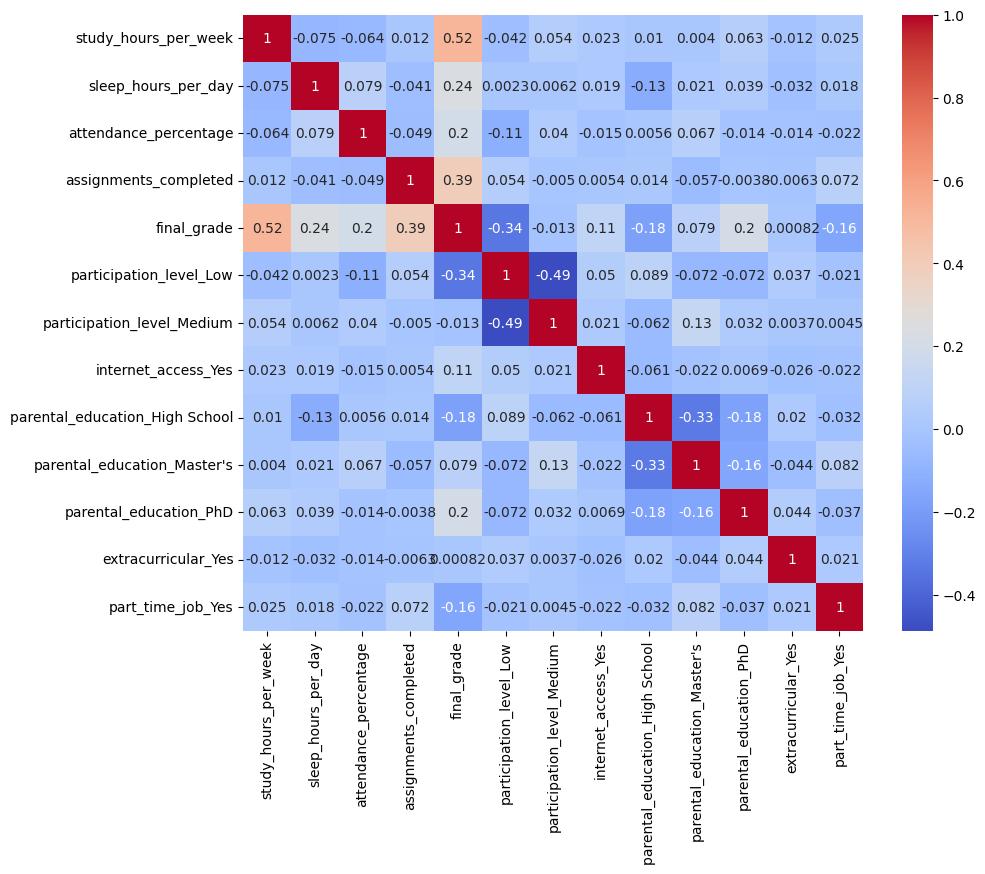

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

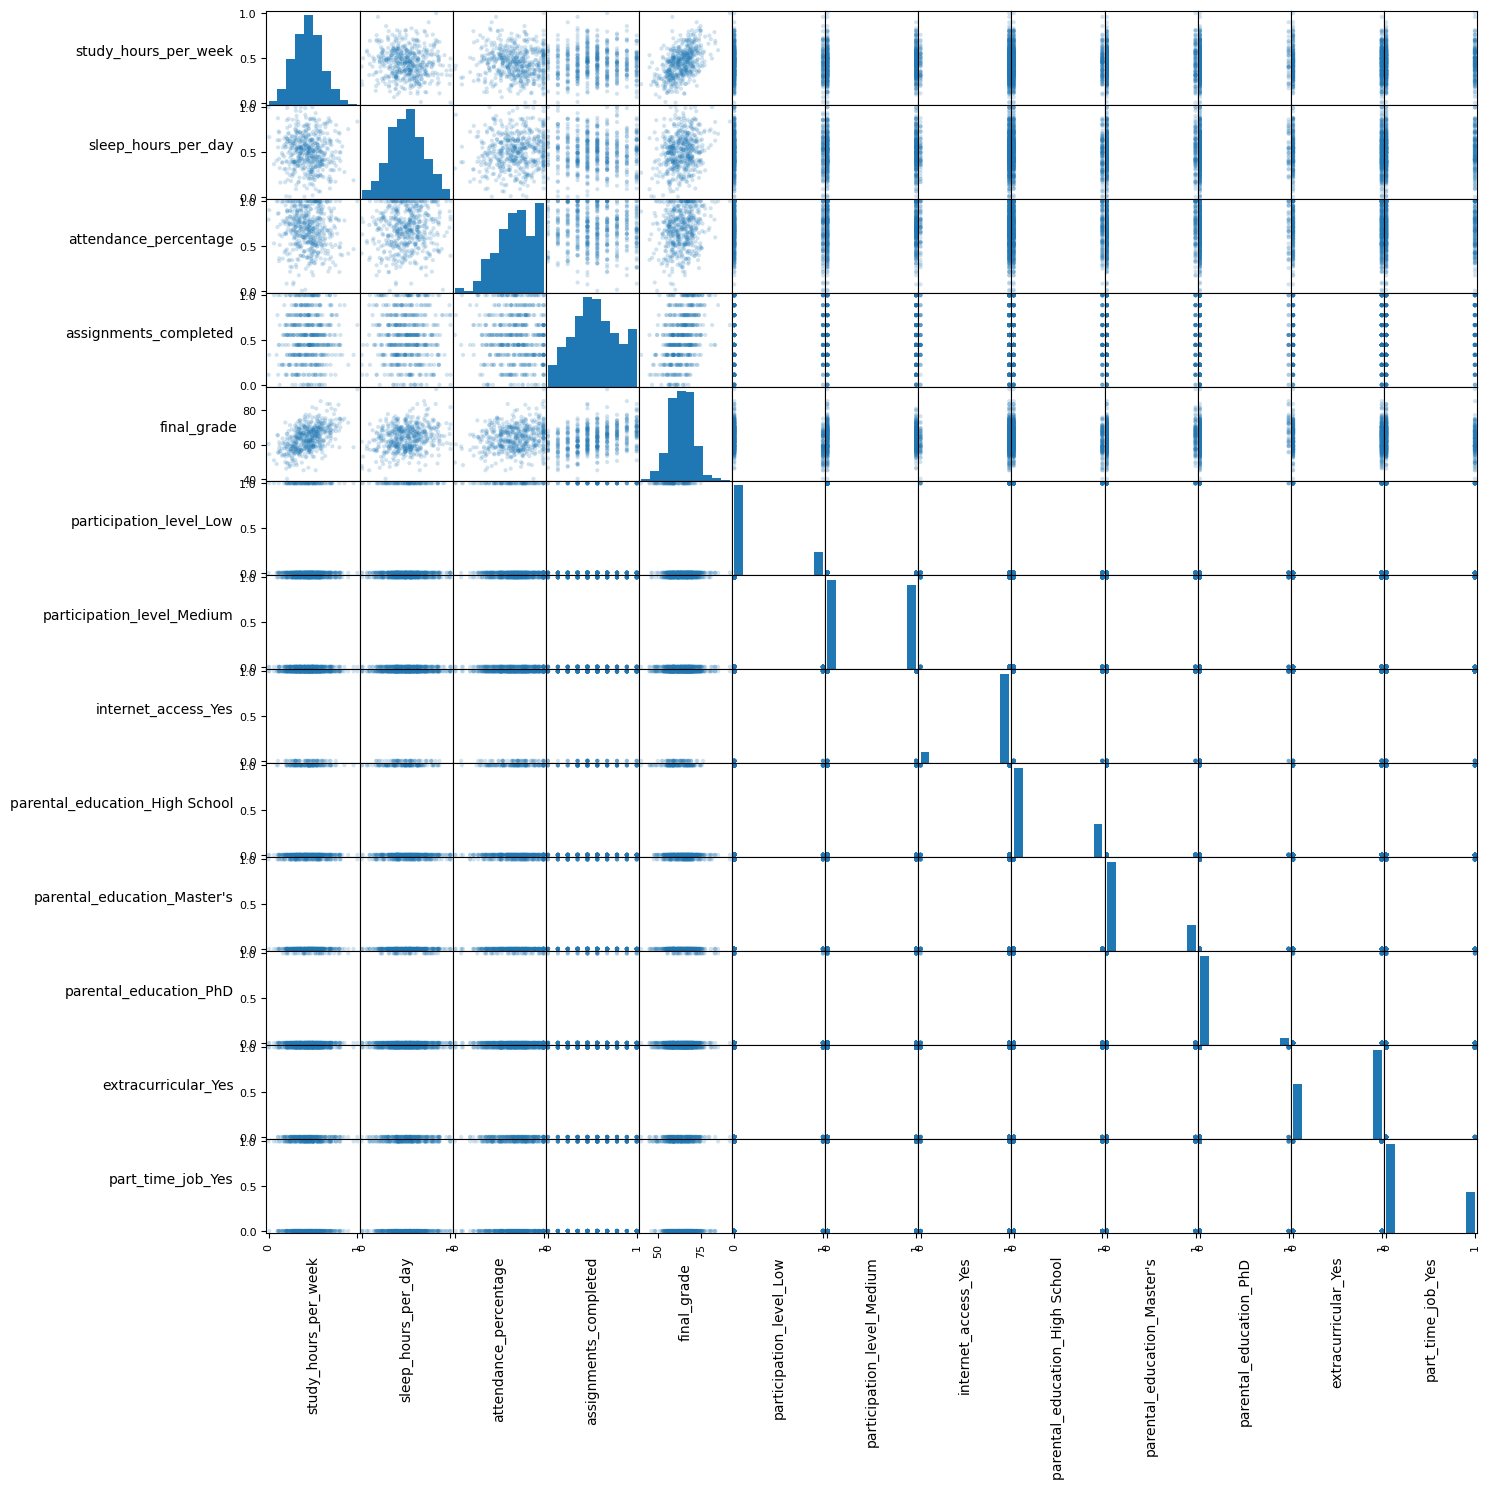

In [8]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15, 15))
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


#4. Pemilihan fitur independen dan dependen

In [9]:
X = df[['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed']]
y = df['final_grade']

X.shape, y.shape

((500, 4), (500,))

#5. Normalisasi Fitur Independen

#6. Data Splitting
📌 Penjelasan:
Menggunakan train_test_split() untuk membagi data menjadi data latih dan data uji.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Pipeline + GridSearchCV + Cross-Validation
📌 Penjelasan Umum:

Pipeline dan GridSearchCV digunakan untuk:

* Menyederhanakan alur preprocessing → training → evaluasi
* Menghindari data leakage dengan menyatukan semua tahapan preprocessing dan training
* Melakukan tuning hyperparameter secara sistematis


## Model (Regresi Lasso)
📌 Penjelasan:
Menggunakan model regresi untuk memprediksi nilai akhir (final_grade).
* Lasso → untuk seleksi fitur (menghilangkan fitur tidak penting)

In [11]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("model", Lasso(alpha=0.2))
    ]
)

In [12]:
param_grid = {
    "model__alpha": [0.1, 0.2, 0.3],
    "pca__n_components": [2, 3, 4]
}

In [13]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [14]:
best_model = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring="r2")

In [15]:
best_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', Lasso(alpha=0.2))]),
             param_grid={'model__alpha': [0.1, 0.2, 0.3],
                         'pca__n_components': [2, 3, 4]},
             scoring='r2')

In [16]:
# get coefficient from best_model
model = best_model.best_estimator_.named_steps["model"]

In [17]:
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.5341242587155219


In [18]:
best_model.best_params_, best_model.best_score_

({'model__alpha': 0.1, 'pca__n_components': 4}, np.float64(0.5284450752507794))

In [21]:
y_pred = best_model.predict(X_test)

In [22]:
ev = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Explained Variance Score:", ev)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Explained Variance Score: 0.5345558807877369
Mean Absolute Error: 4.001726848221999
Mean Squared Error: 26.23882065693582
R2 Score: 0.5341242587155219


Text(0.5, 1.0, 'Actual vs. Predicted Values')

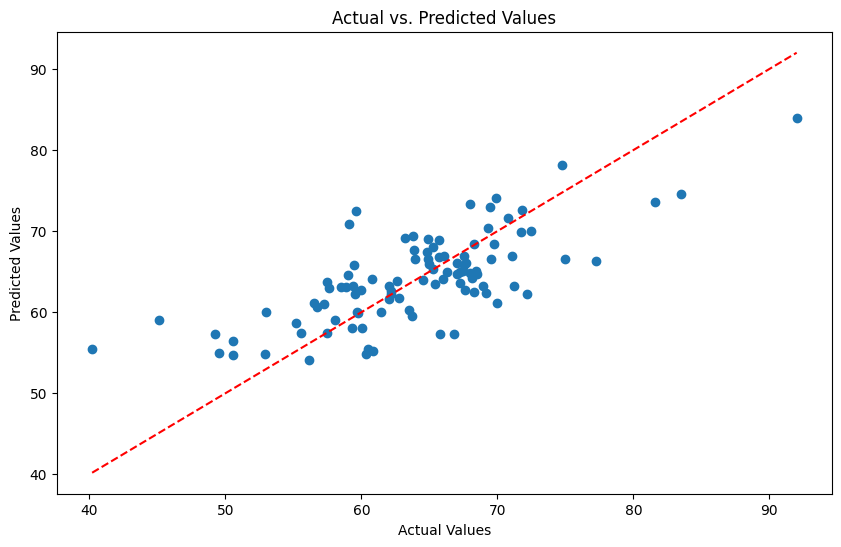

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

#📊 Distribusi Residual (Residual Plot / Error Analysis)

🎯 Tujuan Residual Plot:
* Memeriksa apakah error tersebar simetris di sekitar nol → menandakan model tidak bias sistematis
* Melihat apakah model melakukan underfitting atau overfitting
* Mengidentifikasi apakah ada pola tertentu dalam kesalahan (seharusnya tidak ada pola → random)

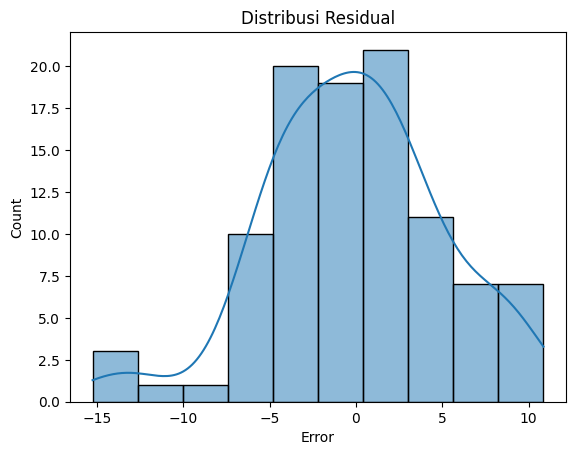

In [24]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Error')
plt.show()

Sebagian besar prediksi model cukup akurat, dengan kesalahan kecil dan tersebar normal. Namun, ada beberapa kasus ekstrem di mana model gagal memprediksi nilai akhir siswa dengan tepat.

#🧮 Visualisasi Feature Importance (Koefisien Model)
🎯 Tujuan Feature Importance:
Mengetahui fitur mana yang paling berpengaruh terhadap prediksi

Jika menggunakan Lasso, fitur dengan koefisien = 0 → tidak penting (dibuang oleh model)
Bisa digunakan untuk:
* Seleksi fitur lanjutan

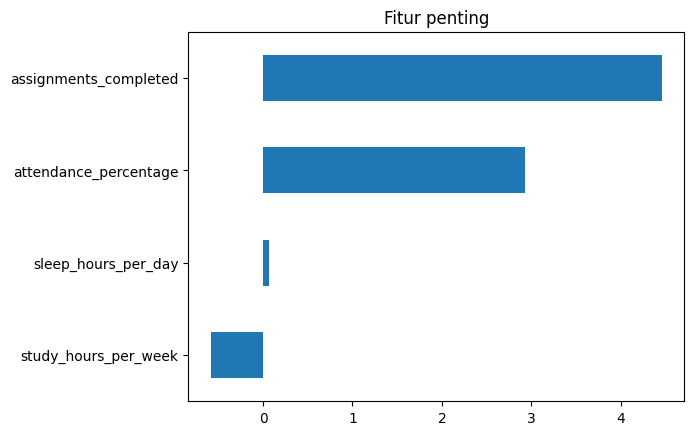

In [25]:
importance = model.coef_
features = X.columns
pd.Series(importance, index=features).sort_values().plot(kind='barh')
plt.title('Fitur penting')
plt.show()

🥇 1. assignments_completed (Paling Berpengaruh Positif)
* Fitur ini memiliki kontribusi terbesar secara absolut, menandakan bahwa semakin banyak tugas yang diselesaikan siswa, semakin tinggi nilai akhir yang dicapai.
* Insight ini mendukung pentingnya kedisiplinan akademik dan tanggung jawab tugas sebagai kunci keberhasilan.

🥈 2. attendance_percentage (Kontributor Signifikan)
* Kehadiran siswa juga memiliki pengaruh yang besar terhadap nilai akhir.
* Ini menunjukkan bahwa kehadiran secara konsisten di kelas berhubungan kuat dengan pemahaman materi dan performa akademik.

🥉 3. study_hours_per_week dan sleep_hours_per_day (Pengaruh Kecil)
* Meskipun study_hours_per_week logisnya penting, pada model ini kontribusinya relatif kecil, mungkin karena waktu belajar tidak selalu berkorelasi dengan efektivitas belajar.
* sleep_hours_per_day juga hanya berkontribusi sedikit—bisa jadi karena rentang tidur siswa cukup seragam atau dampaknya tidak langsung terlihat.

#Inference model

In [26]:
def inference_best_model(study_hours, sleep_hours, attendance, assignments):
  """
  Performs inference using the trained best model.

  Args:
    study_hours: float, study hours per week.
    sleep_hours: float, sleep hours per day.
    attendance: float, attendance percentage.
    assignments: float, assignments completed.

  Returns:
    float, the predicted final grade.
  """
  input_data = np.array([[study_hours, sleep_hours, attendance, assignments]])
  predicted_grade = best_model.predict(input_data)
  return predicted_grade[0]

# Example usage:
predicted_grade = inference_best_model(1.0, 0.12, 1.0, 1.0)
print(f"Predicted final grade: {predicted_grade}")

Predicted final grade: 80.20976428956072


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
